In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\conno_leva1li\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill )

c:\Users\conno_leva1li\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

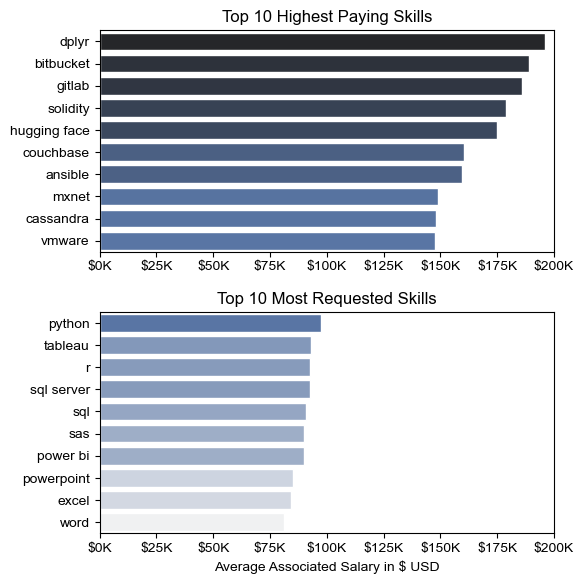

In [10]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_top_pay = df_DA_group.sort_values(by='median', ascending=False).head(10)
df_DA_count = df_DA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
fig, ax = plt.subplots(2,1, figsize=(6,6))


#df_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
#df_DA_count.plot(kind='barh', y='median', ax=ax[1], legend=False)

sns.set_theme(style='ticks')

sns.barplot(data = df_top_pay,x='median', y=df_top_pay.index,ax=ax[0], hue='median', palette='dark:b_r')
sns.barplot(data = df_DA_count,x='median', y=df_DA_count.index,ax=ax[1], hue='median', palette='light:b')


ax[0].set_title('Top 10 Highest Paying Skills', fontsize=12)
ax[1].set_title('Top 10 Most Requested Skills', fontsize=12)
ax[1].set_xlabel('Average Associated Salary in $ USD')
ax[0].set_xlabel('')

for a in ax:
    a.set_xlim(0,200000)
    a.set_ylabel('')
    a.legend().remove()
    a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))
fig.tight_layout()

Histogram


Text(0.5, 12.44444444444443, 'Yearly Salary in $ USD')

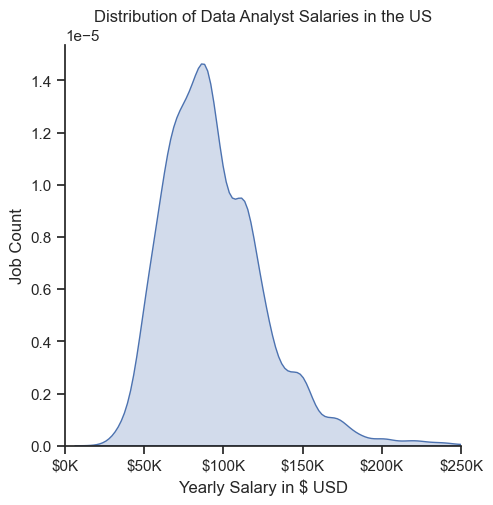

In [12]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


#df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor = 'black')

sns.displot(data=df_DA_US['salary_year_avg'], kind='kde', fill = True)

plt.xlim(0,250000)
ax=plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))
plt.title('Distribution of Data Analyst Salaries in the US')

plt.ylabel('Job Count')
plt.xlabel('Yearly Salary in $ USD')

(0.0, 600000.0)

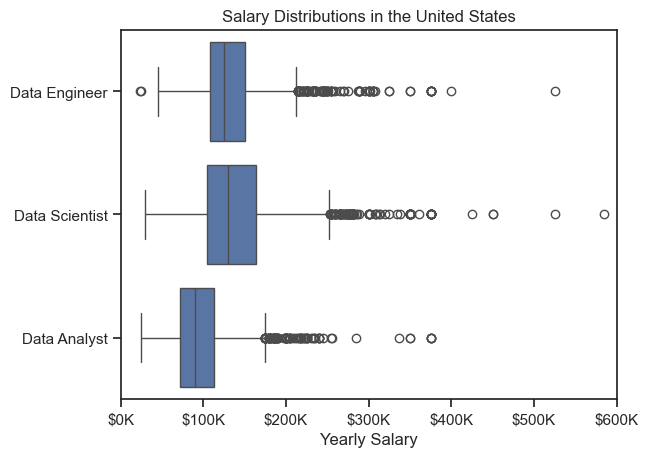

In [15]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

#plt.boxplot(job_list, labels=job_titles, vert=False)

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.ylabel('')
plt.xlabel('Yearly Salary')

plt.title('Salary Distributions in the United States')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))

plt.xlim(0,600000)